In [1]:
import scanpy as sc # import scanpy to handle our AnnData 
import pandas as pd # import pandas to handle dataframes
import matplotlib.pyplot as plt # import matplotlib to visualize our qc metrics

# magic incantation to help matplotlib work with our jupyter notebook
%matplotlib inline 

In [3]:
adata = sc.read('D:/UCI Research/CellxGene Tutorial/data/brain_raw.h5ad')

In [6]:
qc = sc.pp.calculate_qc_metrics(adata, qc_vars = ['ERCC'])

cell_qc_dataframe = qc[0]
gene_qc_dataframe = qc[1]

print('This is the cell quality control dataframe:')
print(cell_qc_dataframe.head(2))

print('\n\n\n\nThis is the gene quality control dataframe:')
print(gene_qc_dataframe.head(2))

This is the cell quality control dataframe:
                       n_genes_by_counts  log1p_n_genes_by_counts  \
cell                                                                
A1.B003290.3_38_F.1.1               3359                 8.119696   
A1.B003728.3_56_F.1.1               1718                 7.449498   

                       total_counts  log1p_total_counts  \
cell                                                      
A1.B003290.3_38_F.1.1        390075           12.874097   
A1.B003728.3_56_F.1.1        776439           13.562475   

                       pct_counts_in_top_50_genes  \
cell                                                
A1.B003290.3_38_F.1.1                   25.884766   
A1.B003728.3_56_F.1.1                   43.051933   

                       pct_counts_in_top_100_genes  \
cell                                                 
A1.B003290.3_38_F.1.1                    32.847017   
A1.B003728.3_56_F.1.1                    52.912721   

            

# Quality control for cells

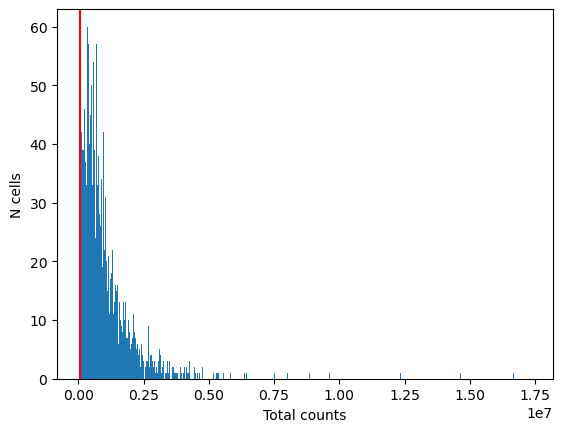

In [7]:
plt.hist(cell_qc_dataframe['total_counts'], bins = 1000)
plt.xlabel('Total counts')
plt.ylabel('N cells')
plt.axvline(50000, color = 'red')

In [ ]:
# Looks like the authors have already removed cells with fewer than 50,000 reads.

# Detected genes

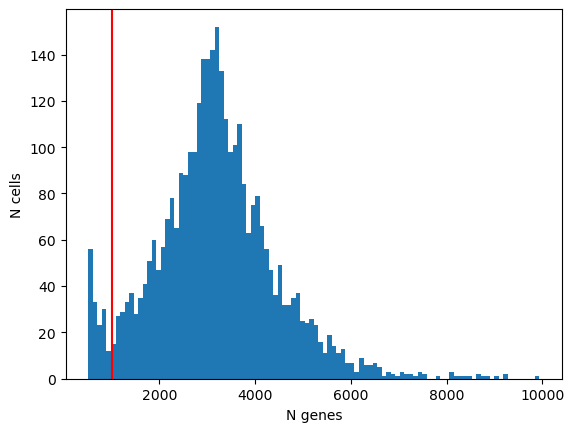

In [8]:
plt.hist(cell_qc_dataframe['n_genes_by_counts'], bins=100)
plt.xlabel('N genes')
plt.ylabel('N cells')
plt.axvline(1000, color='red')

In [9]:
# most cells have between 1000-5000 detected gene
# need to remove cells in the tail of the distribution (fewer than 1000)

# 

# Spike-ins

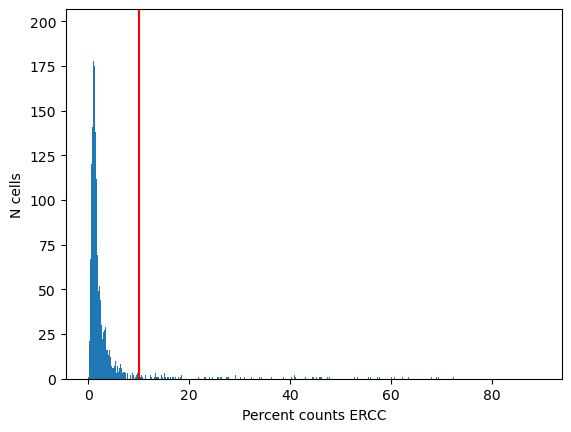

In [10]:
plt.hist(cell_qc_dataframe['pct_counts_ERCC'], bins=1000)
plt.xlabel('Percent counts ERCC')
plt.ylabel('N cells')
plt.axvline(10, color='red')

# Cell filtering

In [11]:
low_ERCC_mask = (cell_qc_dataframe['pct_counts_ERCC'] < 10)
adata = adata[low_ERCC_mask]

In [12]:
help(sc.pp.filter_cells)

Help on function filter_cells in module scanpy.preprocessing._simple:

filter_cells(data: anndata._core.anndata.AnnData, min_counts: Optional[int] = None, min_genes: Optional[int] = None, max_counts: Optional[int] = None, max_genes: Optional[int] = None, inplace: bool = True, copy: bool = False) -> Optional[Tuple[numpy.ndarray, numpy.ndarray]]
    Filter cell outliers based on counts and numbers of genes expressed.
    
    For instance, only keep cells with at least `min_counts` counts or
    `min_genes` genes expressed. This is to filter measurement outliers,
    i.e. “unreliable” observations.
    
    Only provide one of the optional parameters `min_counts`, `min_genes`,
    `max_counts`, `max_genes` per call.
    
    Parameters
    ----------
    data
        The (annotated) data matrix of shape `n_obs` × `n_vars`.
        Rows correspond to cells and columns to genes.
    min_counts
        Minimum number of counts required for a cell to pass filtering.
    min_genes
        Min

In [14]:
print('Started with: \n', adata)
sc.pp.filter_cells(adata, min_genes = 750) # filter cells with fewer 750 genes
print('Finished with: \n', adata)

Started with: 
 View of AnnData object with n_obs × n_vars = 3218 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode'
    var: 'ERCC'


C:\Anaconda\envs\master\Lib\site-packages\scanpy\preprocessing\_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


Finished with: 
 AnnData object with n_obs × n_vars = 3210 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC'


# Quality control for genes

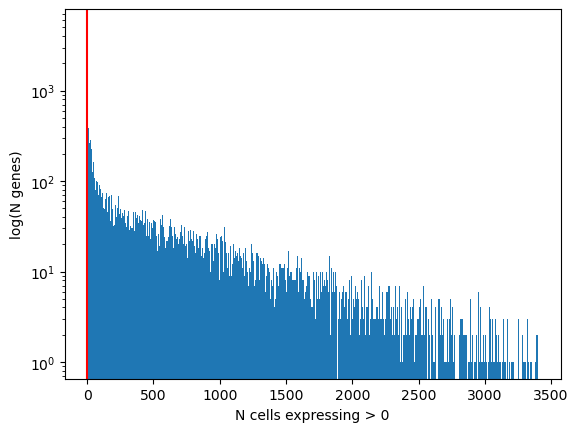

In [15]:
plt.hist(gene_qc_dataframe['n_cells_by_counts'], bins=1000)
plt.xlabel('N cells expressing > 0')
plt.ylabel('log(N genes)') # for visual clarity
plt.axvline(2, color='red') # first parameter here
plt.yscale('log')

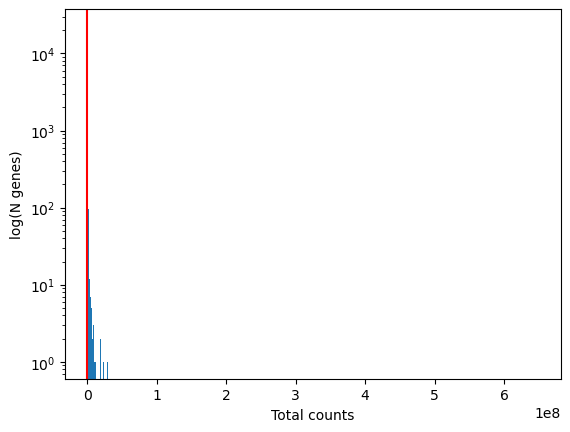

In [16]:
plt.hist(gene_qc_dataframe['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('log(N genes)') # for visual clarity
plt.yscale('log') 
plt.axvline(10, color='red') #second parameter here

In [17]:
print('Started with: \n', adata)
sc.pp.filter_genes(adata, min_cells = 2) # from the above
sc.pp.filter_genes(adata, min_counts = 10) # from the above
print('Finished with: \n', adata)

Started with: 
 AnnData object with n_obs × n_vars = 3210 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC'
Finished with: 
 AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC', 'n_cells', 'n_counts'


In [18]:
adata.write('D:/UCI Research/CellxGene Tutorial/data/brain_qc.h5ad')